<a href="https://colab.research.google.com/github/Ana-Ibarra/OpenClassroomProject/blob/master/P6_class_images_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

import keras

from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import History 
history = History()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


AS a first step, I changed the form of images, creating only sqared images, adding black parts to fullfil when rectangles. Then I saved them in "images_squared" folder.

In [ ]:
# def make_square(im, fill_color=(0, 0, 0, 0)):
#     x, y = im.size
#     size = max(x, y)
#     new_im = Image.new('RGB', (size, size), fill_color)
#     new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
#     return new_im

In [ ]:
# fpath2 = "C:/Users/TorresIbarra/Desktop/MOOCs Ibarra/Openclassrooms/P6_IBARRA_Ana/images_squared"
# for index, category in enumerate(categories):
#     print(index, category) 
#     os.mkdir(fpath2+"/"+category)
#     for image_name in os.listdir(fpath+"/"+category): 
#         img = Image.open(fpath+"/"+category+"/"+image_name)
#         file_type = img.format
#         if img.size[0]!=img.size[1]:
#             img = make_square(img)
#         img.save(fpath2+"/"+category+"/"+image_name)

In [ ]:
# fpath = "/content/drive/My Drive/OC_P6_images/images_squared/"
# for index, category in enumerate(categories):
#     print(index, category) 
#     os.mkdir(fpath2+"/"+category)
#     for image_name in os.listdir(fpath+"/"+category): 
#         img = Image.open(fpath+"/"+category+"/"+image_name)
#         file_type = img.format
#         if img.size[0]!=img.size[1]:
#             img = make_square(img)
#         img.save(fpath2+"/"+category+"/"+image_name)

In [ ]:
fpath = "/content/drive/My Drive/OC_P6_images/images_squared/"
random_seed = 42
squared_size = 224
batch_size = 32
categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02113023-Pembroke', 'n02112350-keeshond', 'n02112706-Brabancon_griffon', 'n02113186-Cardigan', 'n02113624-toy_poodle', 'n02113712-miniature_poodle', 'n02113799-standard_poodle', 'n02113978-Mexican_hairless', 'n02115641-dingo', 'n02115913-dhole', 'n02085620-Chihuahua', 'n02116738-African_hunting_dog', 'n02085782-Japanese_spaniel', 'n02086079-Pekinese', 'n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02087046-toy_terrier', 'n02086910-papillon', 'n02087394-Rhodesian_ridgeback', 'n02088364-beagle', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089973-English_foxhound', 'n02089867-Walker_hound', 'n02090379-redbone', 'n02090622-borzoi', 'n02091032-Italian_greyhound', 'n02090721-Irish_wolfhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n0

#### Test no utiles


In [ ]:
# original_dataset_dir = fpath

# # New directory where will be  stored the dataset
# base_dir = "/content/drive/My Drive/OC_P6_images/splitted
# os.mkdir(base_dir)

# # Directories for splits
# train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# for category in enumerate(categories): 
#     os.mkdir(train_dir+"/"+category)
#     os.mkdir(validation_dir+"/"+category)
#     os.mkdir(test_dir+"/"+category)

# # Copy first 1000 cat images to train_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)



In [ ]:
# def read_resize(squared_size):
#     images=[]
#     labels=[]
#     for index, category in enumerate(categories):
#         print(index, category) # 1 n02085782-Japanese_spaniel
#         for image_name in os.listdir(fpath+"/"+category): # n02085782_1085.jpg
#             img = cv2.imread(fpath+"/"+category+"/"+image_name)
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR is not recognised in next line           
#             img_array = Image.fromarray(img) 
#             if img_array.size[0]!=img_array.size[1]:
#                 img_array = make_square(img_array)
#             resized_img = img_array.resize((squared_size,squared_size))
#             images.append(np.array(resized_img))         
#             labels.append(index)
#     print("No. of images and labels loaded = ",len(images), type(images))
#     return images, labels

In [ ]:
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         'data/train',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')
# validation_generator = test_datagen.flow_from_directory(
#         'data/validation',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')
# model.fit(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800)

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")

In [ ]:
# # Caveat: cache list_ds, otherwise it will perform the directory listing twice.
# ds = train_ds.cache()

# # Add some indices.
# ds = ds.enumerate()

# # Do a rougly 75-25 split.
# train_ds = ds.filter(lambda i, data: i % 10 < 75)
# test_ds = ds.filter(lambda i, data: i % 10 >= 75)

# # Drop indices.
# train_ds = train_ds.map(lambda i, data: data)
# test_ds = test_ds.map(lambda i, data: data)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(image_batch, labels_batch, 
#                                   test_size = 0.25, train_size=0.75, 
#                                   random_state = 1)


# print("\nx_test shape = ",x_test.shape)
# print("y_test shape = ",y_test.shape)
# print("\nx_train shape = ",x_train.shape)
# print("y_train shape = ",y_train.shape)

#### Load dataset

In [ ]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    fpath,
    labels="inferred",
    label_mode='int',
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(squared_size, squared_size),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)

Found 20581 files belonging to 120 classes.
Using 16465 files for training.


In [ ]:
len(train_ds)

515

In [ ]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    fpath,
    labels="inferred",
    label_mode='int',
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(224, 224),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False)

Found 20581 files belonging to 120 classes.
Using 4116 files for validation.


In [ ]:
class_names = train_ds.class_names
print(len(class_names))
class_names = val_ds.class_names
print(len(class_names))

120
120


In [ ]:
for images, labels in train_ds:
  print(images.shape)
  print(labels.shape)
  break

(32, 224, 224, 3)
(32,)


Configure the dataset for performance

In [ ]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# AlexNet CNN model

The architecture consists of eight layers: five convolutional layers and three fully-connected layers.

In [ ]:
model = Sequential()


# 1st Convolutional layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",
                 activation="relu",input_shape=(squared_size,squared_size,3)))

# Normalisation
# model.add(keras.layers.experimental.preprocessing.Rescaling(1./255))

# Apply random data augmentation
model.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model.add(keras.layers.experimental.preprocessing.RandomRotation(0.1))

# Max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

# 2nd Convolutional layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),
                 padding="valid",activation="relu"))

# Max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

# 3rd Convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),
                 padding="valid",activation="relu"))

# 4th Convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),
                 padding="valid",activation="relu"))

# 5th Convolutional layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),
                 padding="valid",activation="relu"))

# Max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())

# 1st Dense layer
model.add(Dense(4096,input_shape=(squared_size,squared_size,3),
                activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# 2nd Dense layer
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# 3rd Dense layer
model.add(Dense(1000,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Output layer
model.add(Dense(len(categories),activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
random_flip (RandomFlip)     (None, 54, 54, 96)        0         
_________________________________________________________________
random_rotation (RandomRotat (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0

In [ ]:
# Compile the CNN model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
commit = "AlexNet_non_Layer_nomr"

In [ ]:
# checkpoint_filepath = '/tmp/checkpoint'

In [ ]:
# model.load_weights(checkpoint_filepath)

In [ ]:
epochs=40

callback_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# model.load_weights(checkpoint_filepath)

In [ ]:
%%time
history = model.fit(train_ds, validation_data = val_ds, epochs=epochs, callbacks=[callback_stop, model_checkpoint_callback])

Epoch 1/40
430/515 [========================>.....] - ETA: 17:22 - loss: 5.2519 - accuracy: 0.0163

In [ ]:
model.save(str("/content/drive/My Drive/OC_P6_images/model"+commit+".h5")

In [ ]:
print(history.history.keys())

In [ ]:
# model = load_model("/content/drive/My Drive/OC_P6_images/classe120_dogs_alex_modifDo1.h5")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=len(acc)
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig(str("/content/drive/My Drive/OC_P6_images/Acc_Loss_"+commit))

In [ ]:
model.save(str("/tmp/model_"+commit))
loaded_model = tf.keras.models.load_model(str("/content/drive/My Drive/OC_P6_images/model"+commit+".h5")

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: ignored

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

Now we're going to change to another CNN pre-trained. First, resize the images, because now we need size=150.

In [ ]:
squared_size = 150
images, labels = read_resize(squared_size);
images = np.array(images)
labels = np.array(labels)
print("images shape:",images.shape)
print("labels shape:",labels.shape)

In [ ]:
x, x_test, y, y_test = train_test_split(images, labels, 
                                  test_size = 0.2, train_size=0.8, 
                                  random_state = random_seed)
x_train, x_valid, y_train, y_valid = train_test_split(x,y,
                                  test_size = 0.25,train_size =0.75)

In [ ]:
y_train.shape

In [ ]:
y_train[100]

In [ ]:
# from tensorflow.keras import layers
# data_augmentation = keras.Sequential(
#         [layers.experimental.preprocessing.RandomFlip("horizontal"),
#          layers.experimental.preprocessing.RandomRotation(0.1)])

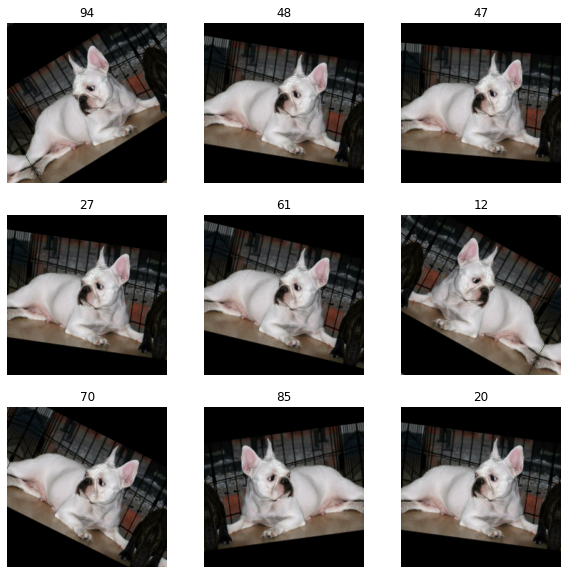

In [ ]:
# import numpy as np

# for images, labels in train_ds.take(1):
#     plt.figure(figsize=(10, 10))
#     first_image = images[0]
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         augmented_image = data_augmentation(
#             tf.expand_dims(first_image, 0), training=True
#         )
#         plt.imshow(augmented_image[0].numpy().astype("int32"))
#         plt.title(int(labels[i]))
#         plt.axis("off")

In [ ]:
# tf.keras.application.Xception.preprocessinginput

In [ ]:
base_model = keras.applications.Xception(
             weights="imagenet",  # Load weights pre-trained on ImageNet.
             input_shape=(squared_size, squared_size, 3),
             include_top=False)

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(squared_size, squared_size, 3))

# Apply random data augmentation
x = data_augmentation(inputs)  

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation= "relu")(x)
# Regularize with dropout
x = keras.layers.Dropout(0.2)(x)  
outputs = keras.layers.Dense(len(categories),activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

model.fit(x_train, y_train, validation_data = (x_valid, y_valid), steps_per_epoch=35, epochs=20) # automatique
# history2 = model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

In [ ]:
# Unfreeze the base_model
base_model.trainable = True
model.summary()

model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

history2 = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), steps_per_epoch=20, epochs=10)